In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sb

In [2]:
df = pd.read_csv("ip_date_sample.csv", delimiter="|")
df.head()

,ip,timestamp
0,xyz.321,1519811397
1,xyz.321,1519811396
2,xyz.213,1519811394
3,xyz.123,1519811392
4,xyz.321,1519811352


In [3]:
df.groupby(['ip']).size()

ip
xyz.123    27
xyz.213    10
xyz.312    24
xyz.321    29
dtype: int64

In [4]:
# group by ip and timestamp and get a count of the grouping
df.groupby(['ip', 'timestamp']).size()

ip       timestamp 
xyz.123  1519809013    4
         1519809033    3
         1519809110    2
         1519809174    2
         1519809209    5
         1519810847    2
         1519810867    2
         1519811352    1
         1519811392    2
         1519811394    2
         1519811397    2
xyz.213  1519809033    1
         1519809112    1
         1519810847    1
         1519810979    1
         1519811352    1
         1519811392    1
         1519811394    2
         1519811396    2
xyz.312  1519809013    1
         1519809110    3
         1519809112    1
         1519809174    3
         1519809209    1
         1519810867    1
         1519810925    4
         1519810979    2
         1519811352    1
         1519811392    1
         1519811394    1
         1519811396    3
         1519811397    2
xyz.321  1519809013    1
         1519809033    2
         1519809110    1
         1519809112    4
         1519809174    1
         1519810847    3
         1519810867    3
     

In [5]:
# same as above, but with labeling info on the count column
counts_df = df.groupby(['ip', 'timestamp']).size().reset_index(name='count')
counts_df

,ip,timestamp,count
0,xyz.123,1519809013,4
1,xyz.123,1519809033,3
2,xyz.123,1519809110,2
3,xyz.123,1519809174,2
4,xyz.123,1519809209,5
5,xyz.123,1519810847,2
6,xyz.123,1519810867,2
7,xyz.123,1519811352,1
8,xyz.123,1519811392,2
9,xyz.123,1519811394,2


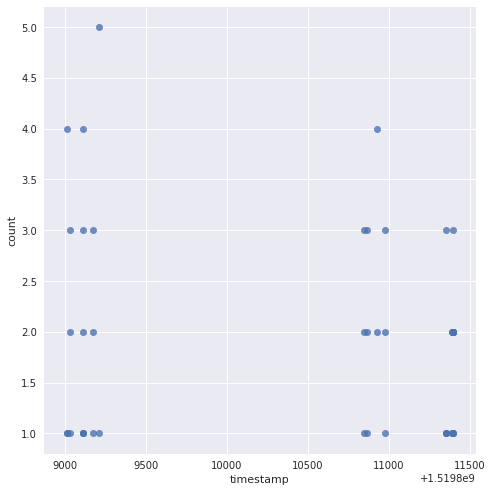

In [6]:
sb.set()
sb.lmplot(x="timestamp", y="count", data=counts_df, fit_reg=False, size = 7)

/usr/local/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


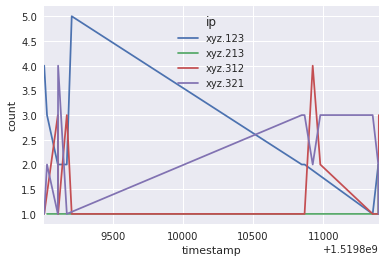

In [7]:
sb.tsplot(counts_df, time="timestamp", unit="ip", condition="ip", value="count")

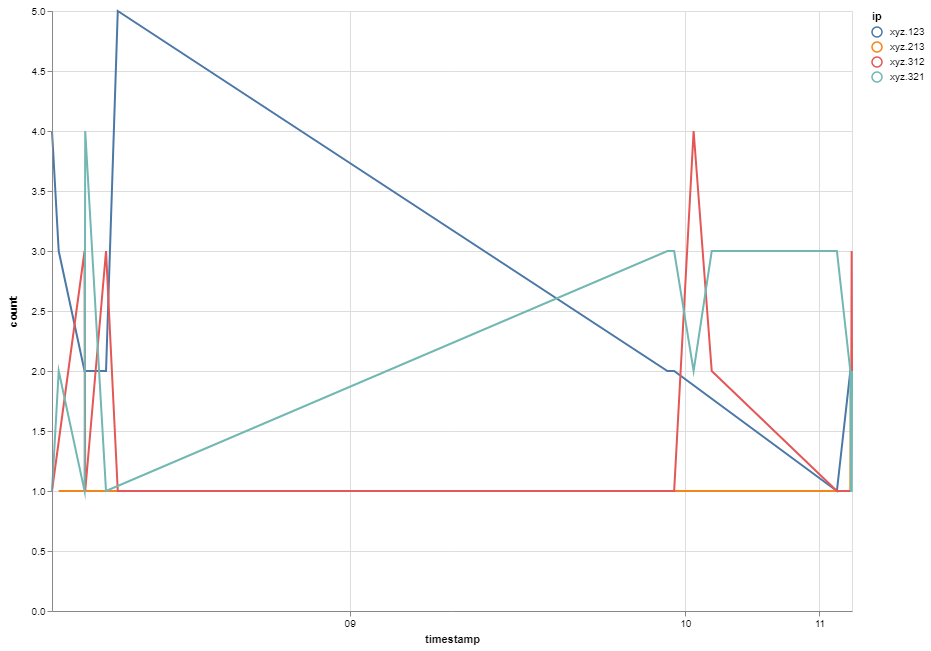

In [9]:
# I HATE using the matplotlib based plotting, HATE IT. Here's the same plot using VegaLite

from vega3 import VegaLite

VegaLite({
  "width": 800,
  "height": 600,
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "description": "IP Address Connections per Sec",
  "mark": "line",
  "encoding": {
    "x": {"field": "timestamp", "type": "temporal", "axis": {"format": "%S"}},
    "y": {"field": "count", "type": "quantitative"},
    "color": {"field": "ip", "type": "nominal"}
  }
}, counts_df)